# Introduction to JAX

This tutorial includes a whirlwind introduction to JAX. It's going to be pretty incomplete so, if you want more info, check out the [JAX docs](https://jax.readthedocs.io).

We'll pretty much always want to include this line since JAX normally operates with single point precision:

In [1]:
import jax

jax.config.update("jax_enable_x64", True)

/opt/homebrew/Caskroom/miniforge/base/envs/tinygp/lib/python3.9/site-packages/jax/_src/lib/__init__.py:32: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


## `jax.numpy`

`jax.numpy` works just like `numpy` (almost always):

In [2]:
import jax.numpy as jnp

x = jnp.linspace(0.1, 5.0, 5)
y = jnp.sin(x)
x, y

(DeviceArray([0.1  , 1.325, 2.55 , 3.775, 5.   ], dtype=float64),
 DeviceArray([ 0.09983342,  0.96994386,  0.55768372, -0.59189456,
              -0.95892427], dtype=float64))

We can combine regular `numpy` and `jax.numpy`:

In [3]:
import numpy as np

x = np.linspace(0.1, 5.0, 5)
y = jnp.sin(x)
x, y

(array([0.1  , 1.325, 2.55 , 3.775, 5.   ]),
 DeviceArray([ 0.09983342,  0.96994386,  0.55768372, -0.59189456,
              -0.95892427], dtype=float64))

## `jax.jit`

We use `jax.jit` to fuse operations, and run them on the GPU, for example.
One of the key points to remember when using JAX is that it works best in a "functional" style.
A lot of the key JAX functions take a function as input and return a new function.
For example:

In [4]:
def jnp_function(x):
    print("hi from this function")
    arg = jnp.sin(x)
    return 1.5 + jnp.exp(arg)

jitted_function = jax.jit(jnp_function)

jitted_function(x)

hi from this function


DeviceArray([2.60498683, 4.13779638, 3.24662214, 2.05327807, 1.883305  ],            dtype=float64)

What happens if we call that function again?

In [5]:
jitted_function(x)

DeviceArray([2.60498683, 4.13779638, 3.24662214, 2.05327807, 1.883305  ],            dtype=float64)

What about if we call it with a different input?

In [6]:
jitted_function(np.sin(x))

DeviceArray([2.60480369, 3.78154758, 3.19761155, 2.07239023, 1.94106009],            dtype=float64)

What about an input with a different shape?

In [7]:
jitted_function(x[:-1])

hi from this function


DeviceArray([2.60498683, 4.13779638, 3.24662214, 2.05327807], dtype=float64)

*Note:* It is common to use `jax.jit` as a "decorator":

In [8]:
@jax.jit
def jitted_function(x):
    arg = jnp.sin(x)
    return 1.5 + jnp.exp(arg)

## `jax.vmap`

`jax.vmap` gives a mechanism for applying a "scalar" function on a vector of inputs.
The same effects can often be achieved by manually broadcasting, but `vmap` comes in handy more often than you might think.

In [9]:
A = np.random.default_rng(1).normal(size=(5, 3))

def scalar_function(x):
    return jnp.outer(x, x)

vector_function = jax.vmap(scalar_function)
vector_function(A)

DeviceArray([[[ 1.19428434e-01,  2.83938242e-01,  1.14193830e-01],
              [ 2.83938242e-01,  6.75056374e-01,  2.71493097e-01],
              [ 1.14193830e-01,  2.71493097e-01,  1.09188661e-01]],

             [[ 1.69821877e+00, -1.17982104e+00, -5.81696252e-01],
              [-1.17982104e+00,  8.19669245e-01,  4.04127838e-01],
              [-5.81696252e-01,  4.04127838e-01,  1.99250259e-01]],

             [[ 2.88318777e-01, -3.12033246e-01, -1.95758328e-01],
              [-3.12033246e-01,  3.37698251e-01,  2.11859620e-01],
              [-1.95758328e-01,  2.11859620e-01,  1.32913032e-01]],

             [[ 8.65139256e-02,  8.35990480e-03,  1.60806056e-01],
              [ 8.35990480e-03,  8.07823801e-04,  1.55388084e-02],
              [ 1.60806056e-01,  1.55388084e-02,  2.98895090e-01]],

             [[ 5.42364622e-01,  1.19975697e-01,  3.55058738e-01],
              [ 1.19975697e-01,  2.65396512e-02,  7.85420322e-02],
              [ 3.55058738e-01,  7.85420322e-02,  2.32

In [10]:
A[:, None, :] * A[:, :, None]

array([[[ 1.19428434e-01,  2.83938242e-01,  1.14193830e-01],
        [ 2.83938242e-01,  6.75056374e-01,  2.71493097e-01],
        [ 1.14193830e-01,  2.71493097e-01,  1.09188661e-01]],

       [[ 1.69821877e+00, -1.17982104e+00, -5.81696252e-01],
        [-1.17982104e+00,  8.19669245e-01,  4.04127838e-01],
        [-5.81696252e-01,  4.04127838e-01,  1.99250259e-01]],

       [[ 2.88318777e-01, -3.12033246e-01, -1.95758328e-01],
        [-3.12033246e-01,  3.37698251e-01,  2.11859620e-01],
        [-1.95758328e-01,  2.11859620e-01,  1.32913032e-01]],

       [[ 8.65139256e-02,  8.35990480e-03,  1.60806056e-01],
        [ 8.35990480e-03,  8.07823801e-04,  1.55388084e-02],
        [ 1.60806056e-01,  1.55388084e-02,  2.98895090e-01]],

       [[ 5.42364622e-01,  1.19975697e-01,  3.55058738e-01],
        [ 1.19975697e-01,  2.65396512e-02,  7.85420322e-02],
        [ 3.55058738e-01,  7.85420322e-02,  2.32439032e-01]]])

## `jax.grad`

Any JAX function can also be differentiated.

In [11]:
grad_function = jax.grad(jitted_function)
grad_function(0.5)

DeviceArray(1.41742422, dtype=float64, weak_type=True)

By default, differentiation is only supported for scalar outputs:

In [12]:
import pytest

with pytest.raises(TypeError) as info:
    jax.grad(jitted_function)(x)
print(info.getrepr())

with pytest.raises(TypeError) as info:
>       jax.grad(jitted_function)(x)
E       TypeError: Gradient only defined for scalar-output functions. Output had shape: (5,).

/var/folders/zt/5rbjzx8n45z24sx33nw21028000151/T/ipykernel_38289/3245152180.py:4: TypeError


But we can combine `grad` with `vmap` to get the derivative at each input point:

In [13]:
jax.vmap(jax.grad(jitted_function))(x)

DeviceArray([ 1.0994665 ,  0.64185181, -1.44978988, -0.44595065,
              0.10872913], dtype=float64)

Another useful function is `jax.value_and_grad`:

In [14]:
jax.vmap(jax.value_and_grad(jitted_function))(x)

(DeviceArray([2.60498683, 4.13779638, 3.24662214, 2.05327807, 1.883305  ],            dtype=float64),
 DeviceArray([ 1.0994665 ,  0.64185181, -1.44978988, -0.44595065,
               0.10872913], dtype=float64))

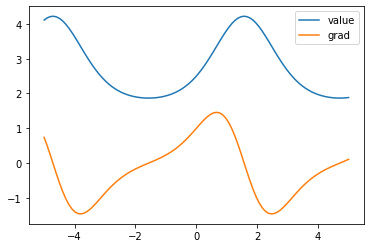

In [15]:
import matplotlib.pyplot as plt

x_grid = jnp.linspace(-5, 5, 100)
value, grad = jax.vmap(jax.value_and_grad(jitted_function))(x_grid)
plt.plot(x_grid, value, label="value")
plt.plot(x_grid, grad, label="grad")
plt.legend();

## PyTrees

Another useful JAX concept is "PyTrees".
This allows us to use structured inputs and still use `jit`, `vmap`, and `grad`.
For example:

In [16]:
def pytree_func(params):
    return jnp.exp(params["log_amp"]) * jnp.sin(params["log_scale"])

params = {
    "log_amp": -1.5,
    "log_scale": 0.1,
}
pytree_func(params)

DeviceArray(0.02227585, dtype=float64, weak_type=True)

In [17]:
jax.grad(pytree_func)(params)

{'log_amp': DeviceArray(0.02227585, dtype=float64, weak_type=True),
 'log_scale': DeviceArray(0.22201544, dtype=float64, weak_type=True)}